<a href="https://colab.research.google.com/github/vaylerie/weather-forecast/blob/main/bigdata_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np

In [ ]:
! pip install -q kaggle

In [ ]:
! kaggle datasets download -d greegtitan/indonesia-climate

Dataset URL: https://www.kaggle.com/datasets/greegtitan/indonesia-climate
License(s): copyright-authors
 56% 4.00M/7.15M [00:00<00:00, 37.1MB/s]
100% 7.15M/7.15M [00:00<00:00, 45.8MB/s]


In [ ]:
!unzip /content/indonesia-climate.zip

Archive:  /content/indonesia-climate.zip
  inflating: climate_data.csv        
  inflating: province_detail.csv     
  inflating: station_detail.csv      


In [ ]:
csv_path = '/content/climate_data.csv'
df = pd.read_csv(csv_path)
df

,date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,station_id
0,01-01-2010,21.4,30.2,27.1,82.0,9.0,0.5,7.0,90.0,5.0,E,96001
1,02-01-2010,21.0,29.6,25.7,95.0,24.0,0.2,6.0,90.0,4.0,E,96001
2,03-01-2010,20.2,26.8,24.5,98.0,63.0,0.0,5.0,90.0,4.0,E,96001
3,04-01-2010,21.0,29.2,25.8,90.0,0.0,0.1,4.0,225.0,3.0,SW,96001
4,05-01-2010,21.2,30.0,26.7,90.0,2.0,0.4,NaN,NaN,NaN,NaN,96001
...,...,...,...,...,...,...,...,...,...,...,...,...
589260,27-12-2020,25.2,31.2,29.2,74.0,0.0,1.4,4.0,280.0,2.0,C,97980
589261,28-12-2020,25.3,31.6,28.1,78.0,NaN,3.0,12.0,260.0,2.0,C,97980
589262,29-12-2020,24.6,32.3,28.4,81.0,NaN,6.5,5.0,260.0,2.0,SW,97980
589263,30-12-2020,25.2,32.6,28.4,80.0,0.0,2.4,7.0,260.0,2.0,C,97980


In [ ]:
print("Missing values summary:")
print(df.isnull().sum())

Missing values summary:
date               0
Tn             23383
Tx             37736
Tavg           45105
RH_avg         48182
RR            125384
ss             43721
ff_x           10214
ddd_x          13128
ff_avg         10127
ddd_car        13739
station_id         0
dtype: int64


In [ ]:
def impute_or_remove(col):
  missing_count = df[col].isnull().sum()
  total_count = len(df)
  missing_percent = (missing_count / total_count) * 100

  # Impute for columns with less than 5% missing values
  if missing_percent < 5:
    df[col].fillna(df[col].mean(), inplace=True)
  # Investigate for moderate missingness (5-20%)
  elif missing_percent < 20:
    # You can choose to impute here (e.g., median) or investigate reasons for missingness
    # This example drops rows with missing values in 'ss'
    df.dropna(subset=[col], inplace=True)
  # Consider alternative approach for high missingness (>20%)
  else:
    print(f"WARNING: High missing value percentage ({missing_percent:.2f}%) in column '{col}'.")
    print("Consider alternative data source or analysis approach for this column.")

# Impute or remove missing values in specific columns
cols_to_handle = ['Tn', 'Tx', 'Tavg', 'RH_avg', 'ff_x', 'ff_avg', 'ss']
for col in cols_to_handle:
  impute_or_remove(col)

# Handle remaining columns (RR, ddd_x, ddd_car) with high missingness
# Replace with your preferred strategy (e.g., investigate alternative data source)
# This example drops rows with missing values in these columns
df.dropna(subset=['RR', 'ddd_x', 'ddd_car'], inplace=True)

In [ ]:
df

,date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,station_id
0,01-01-2010,21.4,30.2,27.1,82.0,9.0,0.5,7.0,90.0,5.0,E,96001
1,02-01-2010,21.0,29.6,25.7,95.0,24.0,0.2,6.0,90.0,4.0,E,96001
2,03-01-2010,20.2,26.8,24.5,98.0,63.0,0.0,5.0,90.0,4.0,E,96001
3,04-01-2010,21.0,29.2,25.8,90.0,0.0,0.1,4.0,225.0,3.0,SW,96001
7,08-01-2010,21.8,29.8,26.8,91.0,3.0,0.6,5.0,90.0,4.0,E,96001
...,...,...,...,...,...,...,...,...,...,...,...,...
589258,25-12-2020,24.4,31.7,28.2,84.0,8.5,6.0,5.0,200.0,3.0,SW,97980
589259,26-12-2020,24.0,31.8,27.6,81.0,1.5,8.1,3.0,140.0,1.0,C,97980
589260,27-12-2020,25.2,31.2,29.2,74.0,0.0,1.4,4.0,280.0,2.0,C,97980
589263,30-12-2020,25.2,32.6,28.4,80.0,0.0,2.4,7.0,260.0,2.0,C,97980


In [ ]:
print("Missing values summary:")
print(df.isnull().sum())

Missing values summary:
date          0
Tn            0
Tx            0
Tavg          0
RH_avg        0
RR            0
ss            0
ff_x          0
ddd_x         0
ff_avg        0
ddd_car       0
station_id    0
dtype: int64


In [ ]:
try:
  # Try converting 'date' to datetime with assumed format '%d-%m-%Y'
  df.index = pd.to_datetime(df['date'], format='%d.%m.%Y')
except ValueError:
  print("Error: Date format might be different. Please check and adjust the format string in 'pd.to_datetime'")


In [ ]:
df

,date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,station_id
date,,,,,,,,,,,,
2010-01-01,2010-01-01,21.4,30.2,27.1,82.0,9.0,0.5,7.0,90.0,5.0,E,96001
2010-01-02,2010-01-02,21.0,29.6,25.7,95.0,24.0,0.2,6.0,90.0,4.0,E,96001
2010-01-03,2010-01-03,20.2,26.8,24.5,98.0,63.0,0.0,5.0,90.0,4.0,E,96001
2010-01-04,2010-01-04,21.0,29.2,25.8,90.0,0.0,0.1,4.0,225.0,3.0,SW,96001
2010-01-08,2010-01-08,21.8,29.8,26.8,91.0,3.0,0.6,5.0,90.0,4.0,E,96001
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-25,2020-12-25,24.4,31.7,28.2,84.0,8.5,6.0,5.0,200.0,3.0,SW,97980
2020-12-26,2020-12-26,24.0,31.8,27.6,81.0,1.5,8.1,3.0,140.0,1.0,C,97980
2020-12-27,2020-12-27,25.2,31.2,29.2,74.0,0.0,1.4,4.0,280.0,2.0,C,97980


In [ ]:
df.describe()

,date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,station_id
count,384302,384302.000000,384302.000000,384302.000000,384302.000000,384302.000000,384302.000000,384302.000000,384302.00000,384302.000000,384302.000000
mean,2015-03-30 15:15:05.419174912,23.377529,31.478809,26.826908,82.801354,8.427616,4.901032,4.808360,191.17403,1.990707,96822.994163
min,2010-01-01 00:00:00,0.000000,0.000000,0.000000,24.000000,-1.000000,0.000000,0.000000,0.00000,0.000000,96001.000000
25%,2012-03-02 00:00:00,23.000000,30.400000,26.200000,79.000000,0.000000,2.400000,3.000000,90.00000,1.000000,96293.000000
50%,2014-12-13 00:00:00,24.000000,31.800000,27.100000,84.000000,1.000000,5.100000,4.000000,180.00000,2.000000,96791.000000
75%,2018-04-23 18:00:00,25.000000,32.800000,28.000000,87.000000,9.000000,7.500000,6.000000,280.00000,3.000000,97232.000000
max,2020-12-31 00:00:00,92.000000,330.000000,34.300000,5045.000000,1965.500000,705.000000,185.000000,888.00000,160.000000,97980.000000
std,NaN,2.135165,2.216606,1.873573,10.484252,17.802928,3.226794,2.659727,109.48095,1.901211,534.087536


In [ ]:
df_2020 = df.loc[df['date'].dt.year == 2020]  # Filter data for year 2022
df_2020

,date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,station_id
date,,,,,,,,,,,,
2020-01-01,2020-01-01,24.8,31.0,27.1,84.0,0.0,9.5,9.0,140.0,7.0,SE,96001
2020-01-02,2020-01-02,24.4,30.6,26.4,84.0,0.5,7.5,6.0,140.0,3.0,SE,96001
2020-01-03,2020-01-03,24.4,31.6,27.1,81.0,0.0,9.5,5.0,140.0,4.0,SE,96001
2020-01-04,2020-01-04,23.6,31.0,26.6,86.0,0.0,9.0,9.0,150.0,6.0,SE,96001
2020-01-06,2020-01-06,24.0,30.4,26.6,87.0,0.0,8.0,9.0,130.0,6.0,SE,96001
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-25,2020-12-25,24.4,31.7,28.2,84.0,8.5,6.0,5.0,200.0,3.0,SW,97980
2020-12-26,2020-12-26,24.0,31.8,27.6,81.0,1.5,8.1,3.0,140.0,1.0,C,97980
2020-12-27,2020-12-27,25.2,31.2,29.2,74.0,0.0,1.4,4.0,280.0,2.0,C,97980


In [ ]:
df_2020.describe()

,date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,station_id
count,36064,36064.000000,36064.000000,36064.000000,36064.000000,36064.000000,36064.00000,36064.000000,36064.000000,36064.000000,36064.000000
mean,2020-06-30 02:12:07.506654720,23.733507,31.588878,27.024146,83.904227,9.701974,5.27683,4.501220,184.019271,1.693536,96831.320292
min,2020-01-01 00:00:00,12.000000,18.600000,17.000000,44.000000,0.000000,0.00000,0.000000,0.000000,0.000000,96001.000000
25%,2020-03-24 00:00:00,23.200000,30.600000,26.400000,80.000000,0.000000,2.70000,3.000000,90.000000,1.000000,96257.000000
50%,2020-06-27 00:00:00,24.000000,31.900000,27.300000,84.000000,1.700000,5.40000,4.000000,180.000000,2.000000,96835.000000
75%,2020-10-10 00:00:00,24.800000,32.900000,28.100000,88.000000,11.000000,7.90000,5.000000,270.000000,2.000000,97230.000000
max,2020-12-31 00:00:00,40.000000,330.000000,33.300000,5045.000000,277.500000,705.00000,46.000000,360.000000,12.000000,97980.000000
std,NaN,1.920468,2.603070,1.814465,26.842966,18.358957,4.83977,1.929532,103.839356,1.014752,539.190713


In [ ]:
df_geofisika_manado = df[df['station_id'] == 97010]

filename = 'geofisika_manado.csv'
df_geofisika_manado.to_csv(filename, index=False)

In [ ]:
df_geofisika_manado.describe()

,date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,station_id
count,1697,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.0
mean,2015-10-06 04:23:54.060105984,19.583525,27.503300,22.846081,89.187979,7.837360,4.027048,3.835592,220.374779,1.355333,97010.0
min,2010-01-06 00:00:00,14.800000,20.600000,20.200000,66.000000,0.000000,0.000000,0.000000,0.000000,0.000000,97010.0
25%,2012-01-18 00:00:00,19.000000,26.600000,22.300000,87.000000,0.000000,1.800000,3.000000,170.000000,1.000000,97010.0
50%,2015-12-10 00:00:00,20.000000,27.600000,22.800000,90.000000,2.000000,3.800000,4.000000,200.000000,1.000000,97010.0
75%,2019-07-12 00:00:00,20.300000,28.400000,23.400000,92.000000,10.000000,6.200000,5.000000,340.000000,2.000000,97010.0
max,2020-12-31 00:00:00,23.312111,31.600000,25.700000,98.000000,139.200000,19.000000,18.000000,380.000000,6.000000,97010.0
std,NaN,1.314948,1.378435,0.857100,4.618145,13.402066,2.803084,1.533650,108.150314,1.097471,0.0


In [ ]:
df_meteorologi_manado = df[df['station_id'] == 97014]
filename = 'meteorologi_manado.csv'
df_meteorologi_manado.to_csv(filename, index=False)
df_meteorologi_manado.describe()

,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,station_id
count,2589.000000,2589.000000,2589.000000,2589.000000,2589.000000,2589.000000,2589.000000,2589.000000,2589.000000,2589.0
mean,22.971553,31.686945,26.963075,81.232472,10.467478,4.887292,4.844341,206.695249,1.743917,97014.0
std,1.022325,1.484151,1.163462,8.036461,17.531656,2.711455,2.057544,116.431037,0.911717,0.0
min,18.000000,24.800000,23.300000,38.000000,0.000000,0.000000,2.000000,4.000000,0.000000,97014.0
25%,22.100000,30.900000,26.200000,78.000000,0.000000,2.800000,3.000000,110.000000,1.000000,97014.0
50%,23.000000,31.800000,26.900000,83.000000,2.400000,4.900000,4.000000,190.000000,2.000000,97014.0
75%,23.800000,32.700000,27.800000,86.000000,14.000000,7.000000,6.000000,320.000000,2.000000,97014.0
max,28.000000,35.800000,30.300000,97.000000,165.000000,11.100000,20.000000,360.000000,8.000000,97014.0


<ipython-input-136-ab2412373dd3>:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='date', y='Tavg', data=df_meteorologi_manado_2018, color='skyblue', palette='YlOrBr', legend=False)


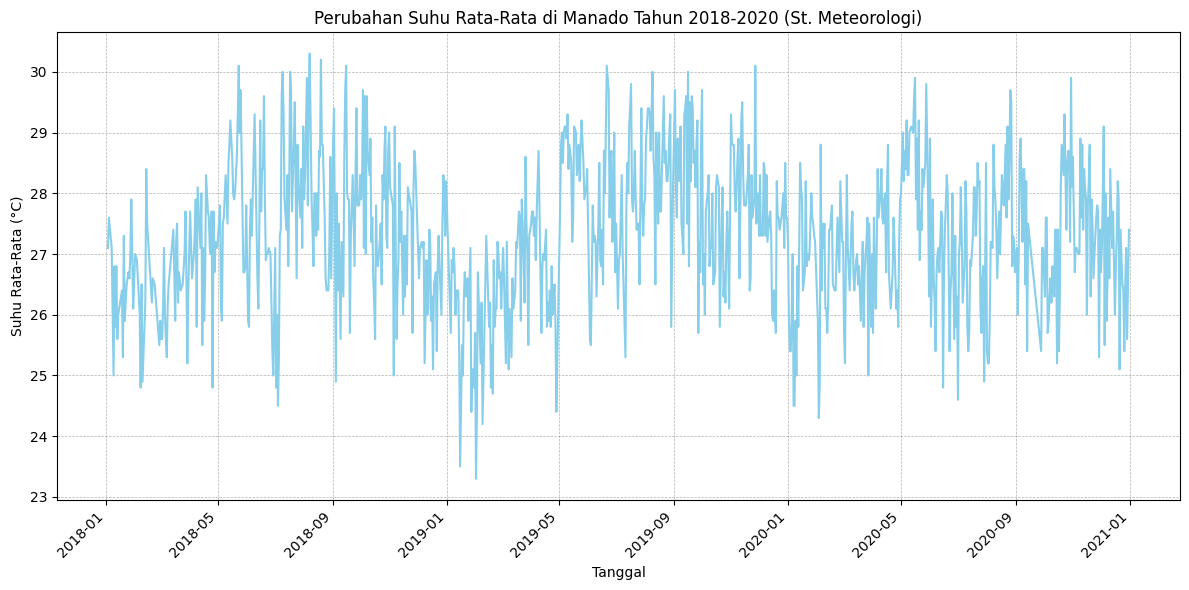

In [ ]:
import seaborn as sns

df_meteorologi_manado_2018 = df_meteorologi_manado.loc[df_meteorologi_manado['date'].dt.year >= 2018]
# Create a line plot with a subtle gradient background and styled axis
plt.figure(figsize=(12, 6))  # Adjust figsize as needed
sns.lineplot(x='date', y='Tavg', data=df_meteorologi_manado_2018, color='skyblue', palette='YlOrBr', legend=False)

# Set axis labels and title
plt.xlabel('Tanggal')
plt.ylabel('Suhu Rata-Rata (°C)')
plt.title('Perubahan Suhu Rata-Rata di Manado Tahun 2018-2020 (St. Meteorologi)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add a subtle grid for better visual reference
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.6)

# Set tight layout for aesthetics
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
df_meteorologi_manado

,date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,station_id
date,,,,,,,,,,,,
2010-01-01,2010-01-01,23.0,30.6,26.3,85.0,0.0,7.0,9.0,350.0,1.0,NW,97014
2010-01-02,2010-01-02,23.0,30.6,26.4,88.0,0.0,3.9,11.0,330.0,1.0,NW,97014
2010-01-03,2010-01-03,23.0,30.6,26.3,86.0,4.0,6.2,8.0,320.0,1.0,NW,97014
2010-01-04,2010-01-04,23.0,30.6,26.4,85.0,0.0,7.1,8.0,330.0,2.0,NW,97014
2010-01-05,2010-01-05,23.0,29.6,25.5,89.0,18.0,2.5,9.0,30.0,1.0,NW,97014
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-26,2020-12-26,23.3,28.0,25.4,88.0,22.8,2.8,2.0,220.0,1.0,C,97014
2020-12-27,2020-12-27,23.0,31.2,26.5,85.0,5.5,0.0,3.0,280.0,1.0,E,97014
2020-12-28,2020-12-28,23.1,32.3,27.1,85.0,0.0,3.0,3.0,290.0,2.0,NW,97014


In [ ]:
df_manado = pd.concat([df_meteorologi_manado, df_geofisika_manado], ignore_index=True)
df_manado
filename = 'df_manado.csv'
df_manado.to_csv(filename, index=False)

In [ ]:
df_manado

,date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,station_id
0,01-01-2010,23.0,30.6,26.3,85.0,0.0,7.0,9.0,350.0,1.0,NW,97014
1,02-01-2010,23.0,30.6,26.4,88.0,0.0,3.9,11.0,330.0,1.0,NW,97014
2,03-01-2010,23.0,30.6,26.3,86.0,4.0,6.2,8.0,320.0,1.0,NW,97014
3,04-01-2010,23.0,30.6,26.4,85.0,0.0,7.1,8.0,330.0,2.0,NW,97014
4,05-01-2010,23.0,29.6,25.5,89.0,18.0,2.5,9.0,30.0,1.0,NW,97014
...,...,...,...,...,...,...,...,...,...,...,...,...
4281,26-12-2020,19.8,24.6,22.1,90.0,139.2,3.0,2.0,280.0,1.0,W,97010
4282,27-12-2020,20.1,27.4,22.9,91.0,17.2,0.0,4.0,340.0,2.0,N,97010
4283,28-12-2020,19.8,26.6,23.0,88.0,1.0,2.0,4.0,320.0,2.0,N,97010
4284,29-12-2020,19.8,26.3,22.3,89.0,8.5,3.8,3.0,250.0,1.0,C,97010


In [ ]:
try:
  # Try converting 'date' to datetime with assumed format '%d-%m-%Y'
  df_manado.date = pd.to_datetime(df_manado['date'], format='%d-%m-%Y')
except ValueError:
  print("Error: Date format might be different. Please check and adjust the format string in 'pd.to_datetime'")

In [ ]:
filename = 'df_manado.csv'
df_manado.to_csv(filename, index=False)

In [ ]:
# Create a line plot with a subtle gradient background and styled axis
plt.figure(figsize=(12, 6))  # Adjust figsize as needed
sns.lineplot(x='date', y='Tavg', data=df_manado, color='skyblue', palette='YlOrBr', legend=False)

# Set axis labels and title
plt.xlabel('Tanggal')
plt.ylabel('Suhu Rata-Rata (°C)')
plt.title('Perubahan Suhu Rata-Rata di Manado Tahun 2010-2020')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add a subtle grid for better visual reference
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.6)

# Set tight layout for aesthetics
plt.tight_layout()

# Show the plot
plt.show()

NameError: name 'plt' is not defined

<Axes: >

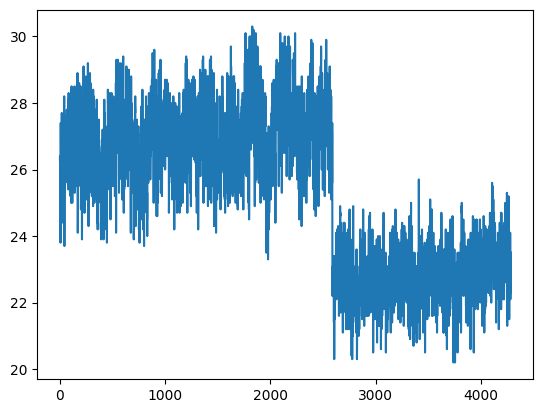

In [ ]:
temp = df_manado['Tavg']
temp.plot()

In [ ]:
# [[[1], [2], [3], [4], [5]]] [6]
# [[[2], [3], [4], [5], [6]]] [7]
# [[[3], [4], [5], [6], [7]]] [8]

def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [ ]:
def df_to_X_y(df_manado, window_size=5):
  df_as_np = df_manado.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [ ]:
WINDOW_SIZE = 5
X1, y1 = df_to_X_y(temp, WINDOW_SIZE)
X1.shape, y1.shape

((4281, 5, 1), (4281,))

In [ ]:
X_train1, y_train1 = X1[:300000], y1[:300000]
X_val1, y_val1 = X1[300000:340000], y1[300000:340000]
X_test1, y_test1 = X1[340000:], y1[340000:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((300000, 5, 1), (300000,), (40000, 5, 1), (40000,), (44297, 5, 1), (44297,))

In [ ]:
X_train1, y_train1 = X1[:3600], y1[:3600]
X_val1, y_val1 = X1[3600:4000], y1[3600:4000]
X_test1, y_test1 = X1[4000:], y1[4000:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((3600, 5, 1), (3600,), (400, 5, 1), (400,), (281, 5, 1), (281,))

In [ ]:
from keras.models import Sequential
from keras.layers import InputLayer, Conv1D, Dropout, Dense, LSTM
from keras.callbacks import ModelCheckpoint
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.optimizers import Adam

# Define model architecture
model1 = Sequential()
model1.add(InputLayer((5, 1)))  # Input shape (window size, features)
model1.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model1.add(LSTM(256))

# Dropout for regularization
model1.add(Dropout(0.2))

# Dense layers for prediction
model1.add(Dense(16, activation='relu'))
model1.add(Dense(1, activation='linear'))  # Single output for prediction

# Print model summary
model1.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_7 (Conv1D)           (None, 3, 128)            512       
                                                                 
 lstm_16 (LSTM)              (None, 256)               394240    
                                                                 
 dropout_8 (Dropout)         (None, 256)               0         
                                                                 
 dense_24 (Dense)            (None, 16)                4112      
                                                                 
 dense_25 (Dense)            (None, 1)                 17        
                                                                 
Total params: 398881 (1.52 MB)
Trainable params: 398881 (1.52 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

In [ ]:
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp1])

Epoch 1/10
9375/9375 [==============================] - 98s 10ms/step - loss: 4.4676 - root_mean_squared_error: 2.1137 - val_loss: 0.9277 - val_root_mean_squared_error: 0.9632
Epoch 2/10
9375/9375 [==============================] - 94s 10ms/step - loss: 1.5940 - root_mean_squared_error: 1.2625 - val_loss: 0.9214 - val_root_mean_squared_error: 0.9599
Epoch 3/10
9375/9375 [==============================] - 95s 10ms/step - loss: 0.9924 - root_mean_squared_error: 0.9962 - val_loss: 0.8884 - val_root_mean_squared_error: 0.9425
Epoch 4/10
9375/9375 [==============================] - 108s 12ms/step - loss: 0.8026 - root_mean_squared_error: 0.8959 - val_loss: 0.8769 - val_root_mean_squared_error: 0.9364
Epoch 5/10
9375/9375 [==============================] - 102s 11ms/step - loss: 0.7773 - root_mean_squared_error: 0.8816 - val_loss: 0.9937 - val_root_mean_squared_error: 0.9968
Epoch 6/10
9375/9375 [==============================] - 99s 11ms/step - loss: 0.7671 - root_mean_squared_error: 0.8758

In [ ]:
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=1000, callbacks=[cp1])

Epoch 1/1000
113/113 [==============================] - 11s 74ms/step - loss: 87.1386 - root_mean_squared_error: 9.3348 - val_loss: 8.1471 - val_root_mean_squared_error: 2.8543
Epoch 2/1000
113/113 [==============================] - 7s 62ms/step - loss: 5.4991 - root_mean_squared_error: 2.3450 - val_loss: 8.0293 - val_root_mean_squared_error: 2.8336
Epoch 3/1000
113/113 [==============================] - 7s 64ms/step - loss: 4.4917 - root_mean_squared_error: 2.1194 - val_loss: 5.2802 - val_root_mean_squared_error: 2.2979
Epoch 4/1000
113/113 [==============================] - 10s 86ms/step - loss: 3.3053 - root_mean_squared_error: 1.8180 - val_loss: 1.7866 - val_root_mean_squared_error: 1.3366
Epoch 5/1000
113/113 [==============================] - 6s 55ms/step - loss: 2.3681 - root_mean_squared_error: 1.5389 - val_loss: 1.1304 - val_root_mean_squared_error: 1.0632
Epoch 6/1000
113/113 [==============================] - 7s 61ms/step - loss: 2.1143 - root_mean_squared_error: 1.4541 - va

In [ ]:
from keras.models import load_model
model1 = load_model('model1/')

In [ ]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

9375/9375 [==============================] - 40s 4ms/step


,Train Predictions,Actuals
0,26.382956,26.7
1,26.336382,27.1
2,26.560564,25.7
3,26.317814,27.3
4,26.857224,26.9
...,...,...
299995,28.089504,27.2
299996,27.460814,28.8
299997,27.984808,26.8
299998,27.402044,27.3


In [ ]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

113/113 [==============================] - 4s 15ms/step


,Train Predictions,Actuals
0,26.334780,24.5
1,25.925297,23.8
2,24.853655,25.7
3,25.489658,27.4
4,26.418728,25.9
...,...,...
3595,22.619938,23.0
3596,22.714176,23.5
3597,22.926079,23.2
3598,22.908159,23.6


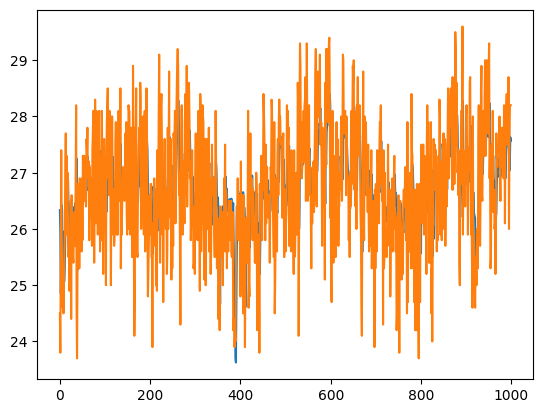

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][:1000])
plt.plot(train_results['Actuals'][:1000])

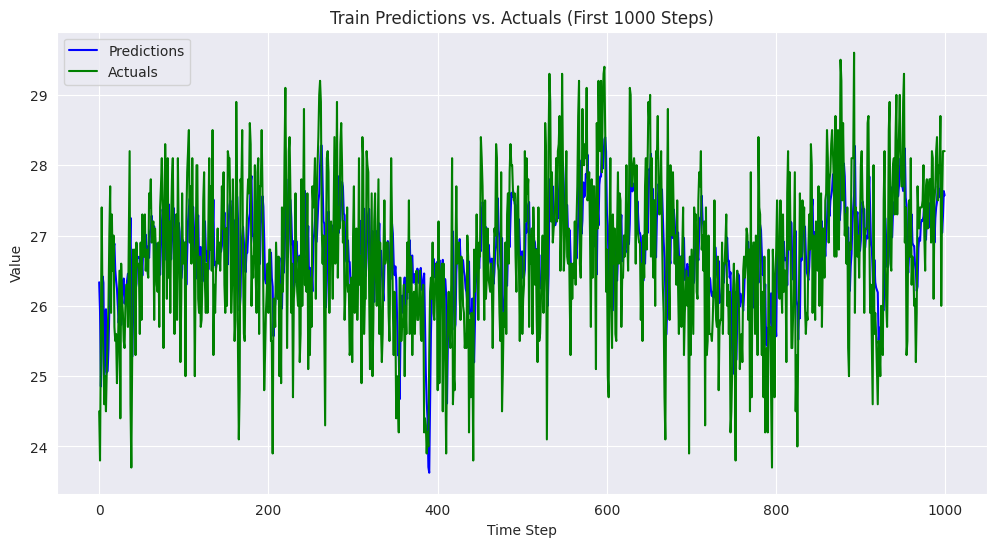

In [ ]:
# Set Seaborn style (optional, choose a style you like)
sns.set_style("darkgrid")

# Create the time series plot
plt.figure(figsize=(12, 6))  # Adjust figure size as needed

# Plot predictions in blue and actuals in green
plt.plot(train_results['Train Predictions'][:1000], label='Predictions', color='blue')
plt.plot(train_results['Actuals'][:1000], label='Actuals', color='green')

# Set labels and title
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.title('Train Predictions vs. Actuals (First 1000 Steps)')

# Add legend
plt.legend()

# Grid lines for better readability
plt.grid(True)

# Show the plot
plt.show()

In [ ]:
val_predictions = model1.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val1})
val_results

13/13 [==============================] - 0s 6ms/step


,Val Predictions,Actuals
0,23.111544,22.0
1,22.696871,22.0
2,22.513132,22.9
3,22.619408,23.0
4,22.741093,23.7
...,...,...
395,22.979637,24.2
396,23.350933,23.0
397,23.022377,24.0
398,23.352818,23.7


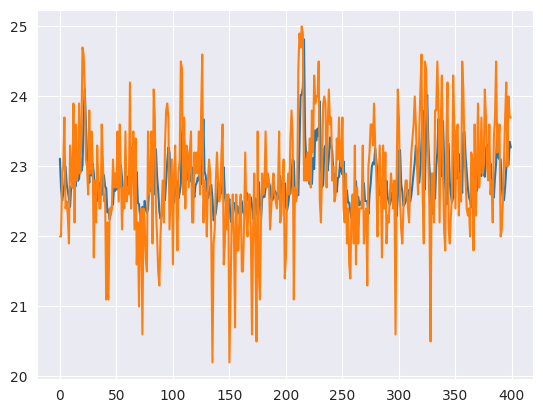

In [ ]:
plt.plot(val_results['Val Predictions'])
plt.plot(val_results['Actuals'])

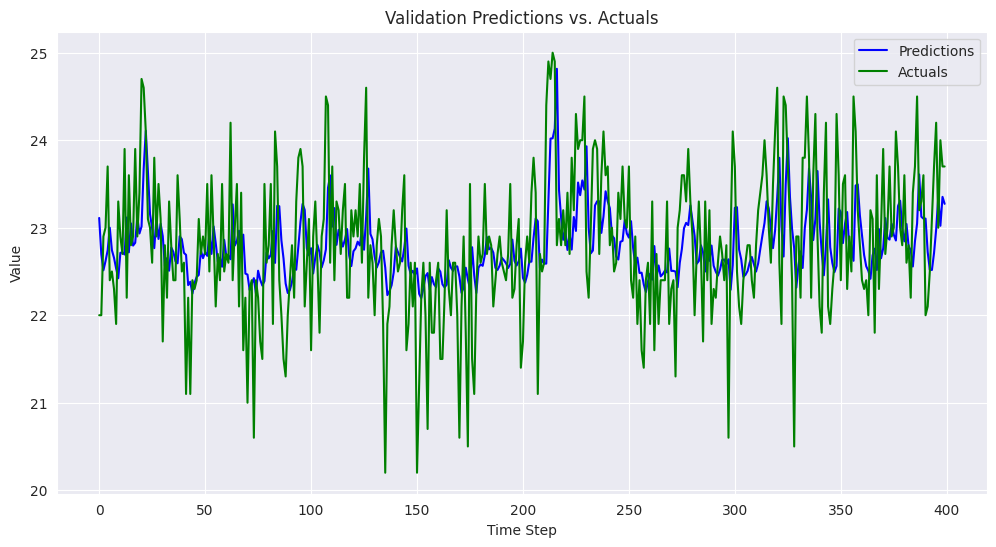

In [ ]:
# Assuming val_results is a dictionary with 'Val Predictions' and 'Actuals' keys

# Set Seaborn style (optional, choose a style you like)
sns.set_style("darkgrid")  # Example style, adjust as needed

# Create the time series plot
plt.figure(figsize=(12, 6))  # Adjust figure size as needed

# Plot predictions in blue and actuals in green
plt.plot(val_results['Val Predictions'], label='Predictions', color='blue')
plt.plot(val_results['Actuals'], label='Actuals', color='green')

# Set labels and title
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.title('Validation Predictions vs. Actuals')

# Add legend
plt.legend()

# Grid lines for better readability
plt.grid(True)

# Show the plot
plt.show()

In [ ]:
test_predictions = model1.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test1})
test_results

9/9 [==============================] - 0s 10ms/step


,Test Predictions,Actuals
0,23.337013,23.2
1,23.030014,23.6
2,23.155087,23.8
3,23.241299,22.1
4,22.754654,22.2
...,...,...
276,23.248388,22.1
277,22.749676,22.9
278,22.787136,23.0
279,22.790670,22.3


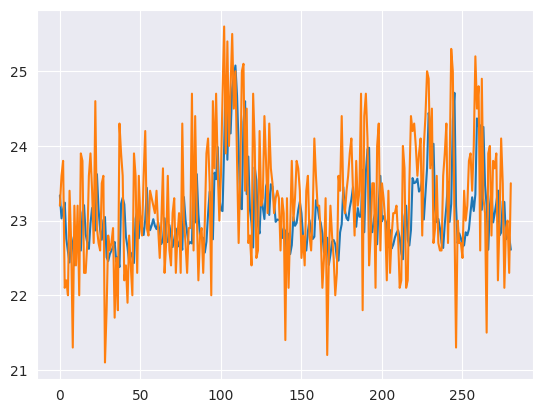

In [ ]:
plt.plot(test_results['Test Predictions'])
plt.plot(test_results['Actuals'])

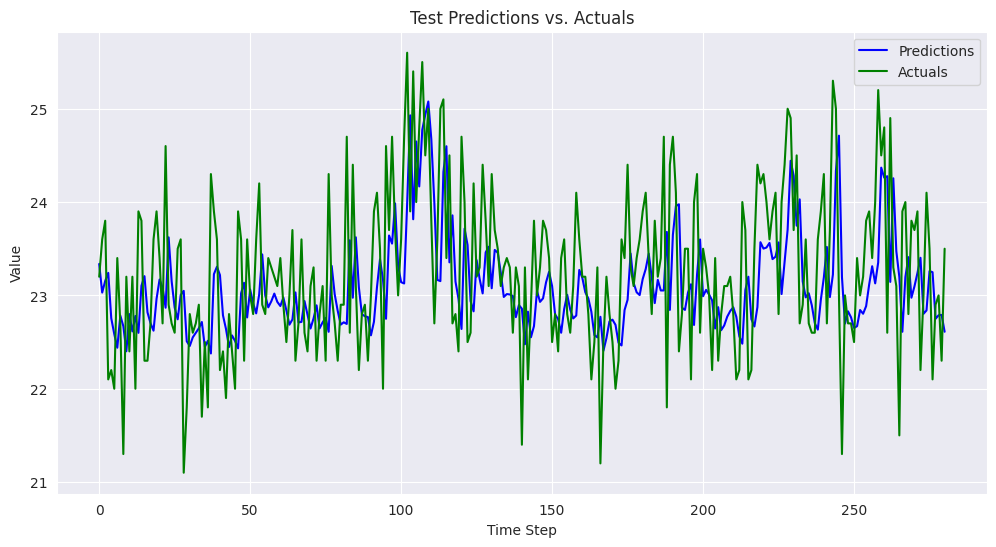

In [ ]:
# Assuming test_results is a dictionary with 'Test Predictions' and 'Actuals' keys

# Set Seaborn style (optional, choose a style you like)
sns.set_style("darkgrid")  # Example style, adjust as needed

# Create the time series plot
plt.figure(figsize=(12, 6))  # Adjust figure size as needed

# Plot predictions in blue and actuals in green
plt.plot(test_results['Test Predictions'], label='Predictions', color='blue')
plt.plot(test_results['Actuals'], label='Actuals', color='green')

# Set labels and title
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.title('Test Predictions vs. Actuals')

# Add legend
plt.legend()

# Grid lines for better readability
plt.grid(True)

# Show the plot
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error as mse

def plot_predictions1(model, X, y, start=0, end=100):
  predictions = model.predict(X).flatten()
  df = pd.DataFrame(data={'Predictions': predictions, 'Actuals':y})
  plt.plot(df['Predictions'][start:end])
  plt.plot(df['Actuals'][start:end])
  return df, mse(predictions, y)

9/9 [==============================] - 0s 6ms/step


(     Predictions  Actuals
 0      23.337013     23.2
 1      23.030014     23.6
 2      23.155087     23.8
 3      23.241299     22.1
 4      22.754654     22.2
 ..           ...      ...
 276    23.248388     22.1
 277    22.749676     22.9
 278    22.787136     23.0
 279    22.790670     22.3
 280    22.610565     23.5
 
 [281 rows x 2 columns],
 0.694888467888514)

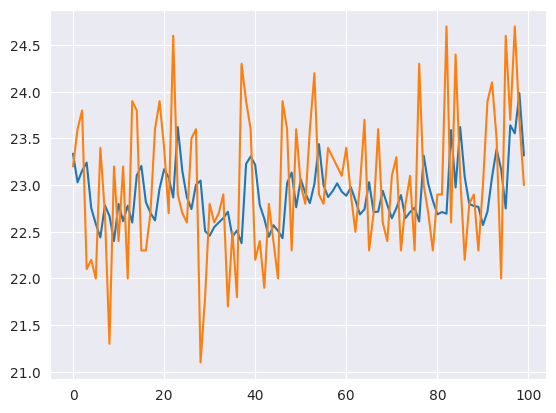

In [ ]:
plot_predictions1(model1, X_test1, y_test1)

9/9 [==============================] - 0s 6ms/step


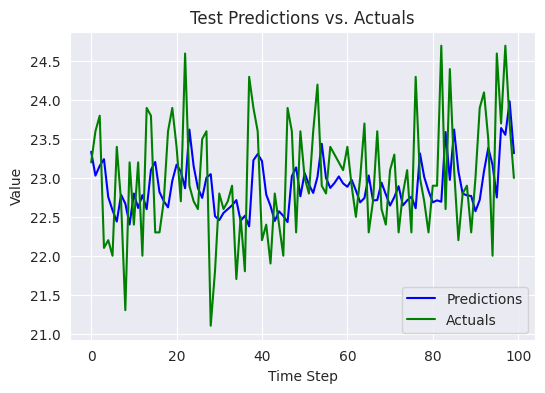

Mean Squared Error (MSE): 0.6949
Mean Absolute Error (MAE): 0.6707


In [ ]:
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae

def plot_predictions1(model, X, y, start=0, end=100):
  """
  Plots predictions vs. actuals and calculates performance metrics.

  Args:
      model: Trained model to make predictions.
      X: Input data for predictions.
      y: True target values.
      start: Starting index for plotting (default: 0).
      end: Ending index for plotting (default: 100).

  Returns:
      A Pandas DataFrame containing predictions and actuals,
      mean squared error (MSE), and mean absolute error (MAE).
  """

  # Make predictions
  predictions = model.predict(X).flatten()

  # Create DataFrame
  df = pd.DataFrame(data={'Predictions': predictions, 'Actuals': y})

  # Set Seaborn style (optional, adjust as needed)
  sns.set_style("darkgrid")

  # Create the time series plot
  plt.figure(figsize=(6, 4))  # Adjust figure size as needed

  # Plot predictions in blue and actuals in green
  plt.plot(df['Predictions'][start:end], label='Predictions', color='blue')
  plt.plot(df['Actuals'][start:end], label='Actuals', color='green')

  # Set labels and title
  plt.xlabel('Time Step')
  plt.ylabel('Value')
  plt.title('Test Predictions vs. Actuals')

  # Add legend
  plt.legend()

  # Grid lines for better readability
  plt.grid(True)

  # Calculate and return metrics
  mse_value = mse(predictions, y)
  mae_value = mae(predictions, y)

  # Show the plot
  plt.show()

  return df, mse_value, mae_value

# Example usage
df, mse, mae = plot_predictions1(model1, X_test1, y_test1)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

In [ ]:
model2 = Sequential()
model2.add(InputLayer((5, 1)))
model2.add(Conv1D(128, kernel_size=2, activation='relu'))
model2.add(Flatten())
model2.add(Dense(8, 'relu'))
model2.add(Dense(1, 'linear'))
model2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 4, 128)            384       
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dense_12 (Dense)            (None, 8)                 4104      
                                                                 
 dense_13 (Dense)            (None, 1)                 9         
                                                                 
Total params: 4497 (17.57 KB)
Trainable params: 4497 (17.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
cp2 = ModelCheckpoint('model2/', save_best_only=True)
model2.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [ ]:
model2.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp2])

Epoch 1/10
9375/9375 [==============================] - 24s 2ms/step - loss: 22.8645 - root_mean_squared_error: 4.7817 - val_loss: 0.8707 - val_root_mean_squared_error: 0.9331
Epoch 2/10
9375/9375 [==============================] - 25s 3ms/step - loss: 0.8024 - root_mean_squared_error: 0.8957 - val_loss: 0.8259 - val_root_mean_squared_error: 0.9088
Epoch 3/10
9375/9375 [==============================] - 25s 3ms/step - loss: 0.7699 - root_mean_squared_error: 0.8775 - val_loss: 0.8006 - val_root_mean_squared_error: 0.8948
Epoch 4/10
9375/9375 [==============================] - 23s 2ms/step - loss: 0.7583 - root_mean_squared_error: 0.8708 - val_loss: 0.7989 - val_root_mean_squared_error: 0.8938
Epoch 5/10
9375/9375 [==============================] - 25s 3ms/step - loss: 0.7540 - root_mean_squared_error: 0.8683 - val_loss: 0.7902 - val_root_mean_squared_error: 0.8889
Epoch 6/10
9375/9375 [==============================] - 21s 2ms/step - loss: 0.7521 - root_mean_squared_error: 0.8673 - val_

1385/1385 [==============================] - 4s 3ms/step


(       Predictions  Actuals
 0        27.059364     25.7
 1        26.503029     28.1
 2        27.310757     28.1
 3        27.513767     27.8
 4        27.580696     28.3
 ...            ...      ...
 44292    27.934324     28.2
 44293    28.065388     27.6
 44294    27.851812     29.2
 44295    28.405207     28.4
 44296    28.329430     26.7
 
 [44297 rows x 2 columns],
 0.817496639429238)

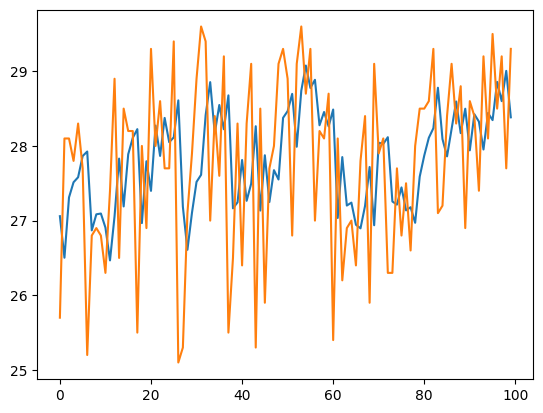

In [ ]:
plot_predictions1(model2, X_test1, y_test1)

In [ ]:
model3 = Sequential()
model3.add(InputLayer((5, 1)))
model3.add(GRU(64))
model3.add(Dense(8, 'relu'))
model3.add(Dense(1, 'linear'))
model3.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 64)                12864     
                                                                 
 dense_14 (Dense)            (None, 8)                 520       
                                                                 
 dense_15 (Dense)            (None, 1)                 9         
                                                                 
Total params: 13393 (52.32 KB)
Trainable params: 13393 (52.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
cp3 = ModelCheckpoint('model3/', save_best_only=True)
model3.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [ ]:
model3.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp3])

Epoch 1/10
9375/9375 [==============================] - 52s 5ms/step - loss: 30.9263 - root_mean_squared_error: 5.5611 - val_loss: 0.8287 - val_root_mean_squared_error: 0.9103
Epoch 2/10
9375/9375 [==============================] - 48s 5ms/step - loss: 0.7540 - root_mean_squared_error: 0.8683 - val_loss: 0.8170 - val_root_mean_squared_error: 0.9039
Epoch 3/10
9375/9375 [==============================] - 49s 5ms/step - loss: 0.7439 - root_mean_squared_error: 0.8625 - val_loss: 0.8023 - val_root_mean_squared_error: 0.8957
Epoch 4/10
9375/9375 [==============================] - 45s 5ms/step - loss: 0.7405 - root_mean_squared_error: 0.8605 - val_loss: 0.8183 - val_root_mean_squared_error: 0.9046
Epoch 5/10
9375/9375 [==============================] - 44s 5ms/step - loss: 0.7392 - root_mean_squared_error: 0.8597 - val_loss: 0.8337 - val_root_mean_squared_error: 0.9131
Epoch 6/10
9375/9375 [==============================] - 49s 5ms/step - loss: 0.7387 - root_mean_squared_error: 0.8594 - val_

In [ ]:
temp

date
2010-01-01    27.1
2010-01-02    25.7
2010-01-03    24.5
2010-01-04    25.8
2010-01-08    26.8
              ... 
2020-12-25    28.2
2020-12-26    27.6
2020-12-27    29.2
2020-12-30    28.4
2020-12-31    26.7
Name: Tavg, Length: 384302, dtype: float64

1385/1385 [==============================] - 10s 6ms/step


(       Predictions  Actuals
 0        26.944815     25.7
 1        26.468912     28.1
 2        27.200041     28.1
 3        27.382607     27.8
 4        27.387205     28.3
 ...            ...      ...
 44292    27.689302     28.2
 44293    27.828178     27.6
 44294    27.609623     29.2
 44295    28.189503     28.4
 44296    28.079922     26.7
 
 [44297 rows x 2 columns],
 0.8683758530266016)

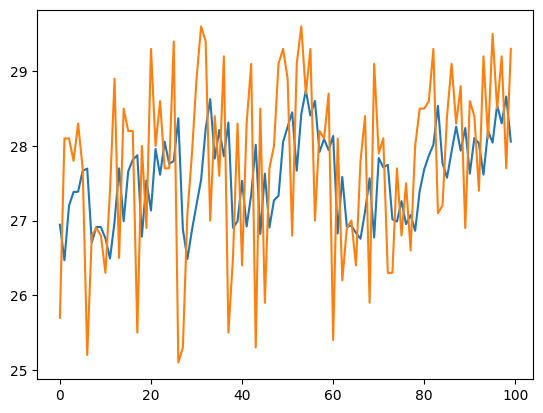

In [ ]:
plot_predictions1(model3, X_test1, y_test1)